### Data analysis

В этом блокноте я провожу анализ данных, сгенерированных LLM, для корректировки данных, для улучшения показтелей обучения LoRA. 


В рамках данной части проекта я смотрю какие ингредиенты есть в аугментированном датасете, а какие были пропущены.
Выведу позиции, ингредиенты в которых не соответсвуют исходному датасету, для дальнейшей корректировки

In [ ]:
import nltk
import pandas as pd
import pymorphy3
import re
from nltk.corpus import stopwords
nltk.download('stopwords')  
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
stop_words = set(stopwords.words('russian')) 
morph = pymorphy3.MorphAnalyzer()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrpec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text_set):
    """
    Удаляет знаки препинания, табы, абзацы, цифры, двойные пробелы. 
    Приводит к нижнему регистру
    """
    sentences = list()
    for sentence in text_set:
        sentence = re.sub(r'[^\w\s]', ' ', sentence)
        sentence = re.sub(r'\s+',' ', sentence)
        sentence = sentence.lower()
        sentences.append(sentence)
    return sentences


def lemmatize_sentence(sentence):
    """
    Лемматизирует слова в позициях меню
    """
    words = sentence.split()  
    lemmas = []
    for word in words:
        parsed_word = morph.parse(word)[0]  
        lemma = parsed_word.normal_form  
        if lemma not in stop_words:
            lemmas.append(lemma)
    return ' '.join(lemmas)  

def unique_words(lemmatized_sentences_set):
    """
    Выводит спиок уникальных ингредиентов по всем позициям
    """
    words= []
    for sentence in lemmatized_sentences_set:
        words.extend(sentence.split())
    return list(set(words))

def differences(word_set1, word_set2, sentence_set2):
    """
    Выводит датафрейм ингредиентов, позиции с которыми необходимо 
    добавить в аугментированный датасет или убрать из него 
    и номер позиции, в которой этот ингридиент встречается
    """
    words_to_add = []
    words_to_remove = []
    sentence_remove_index = []

    for word in word_set1:
        if word not in word_set2:
            words_to_add.append(word)
            
    for word in word_set2:
        if word not in word_set1:
            words_to_remove.append(word)
            indexes = [i for i, sent in enumerate(sentence_set2) if word in sent]
            sentence_remove_index.append(indexes)
   

    max_len = max(len(words_to_add), len(words_to_remove))
    
    words_to_add += [None] * (max_len - len(words_to_add))
    words_to_remove += [None] * (max_len - len(words_to_remove))

    dictionary = {
        "add": words_to_add,
        "remove": words_to_remove,
        "remove_index": sentence_remove_index
    }

    df = pd.DataFrame.from_dict(dictionary)
    return df


def total_slay(text):
    '''
    Сборная функция
    '''
    cleaned_sentences = clean_text(text)
    lemmatized_sentences = [lemmatize_sentence(sentence) for sentence in cleaned_sentences]
    words_unique = unique_words(lemmatized_sentences)
    return words_unique, lemmatized_sentences

In [113]:
data_src = pd.read_csv("data/src_data_en.csv")
data_src = data_src["Russian"]

data_aug = pd.read_csv("data/augmented_ver_2.csv")
data_aug = data_aug['Russian']

unique_src, sentece_set_src = total_slay(data_src)
unique_aug, sentece_set_aug =  total_slay(data_aug)

final_data = pd.read_csv("data/full_data_ver_2.csv")
final_data = final_data["Russian"]
_, final_data = total_slay(final_data)

differences_df = differences(unique_src, unique_aug, final_data)
differences_df.to_csv("data/differences_ver_2.csv")

In [114]:
differences_df

,add,remove,remove_index
0,история,летний,[]
1,истина,азартный,[]
2,обрасти,украсить,"[664, 907]"
3,печать,горчица,[123]
4,дело,чечевица,[]
...,...,...,...
398,None,пряность,"[261, 280]"
399,None,арктический,[258]
400,None,обжечь,"[554, 975]"
401,None,бефстроганов,[]


In [115]:
words1 = ' '.join(sentece_set_src).split()
words2 = ' '.join(sentece_set_aug).split()

freq_src = Counter(words1)
freq_aug = Counter(words2)

C:\Users\mrpec\AppData\Local\Temp\ipykernel_22172\1653012068.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")


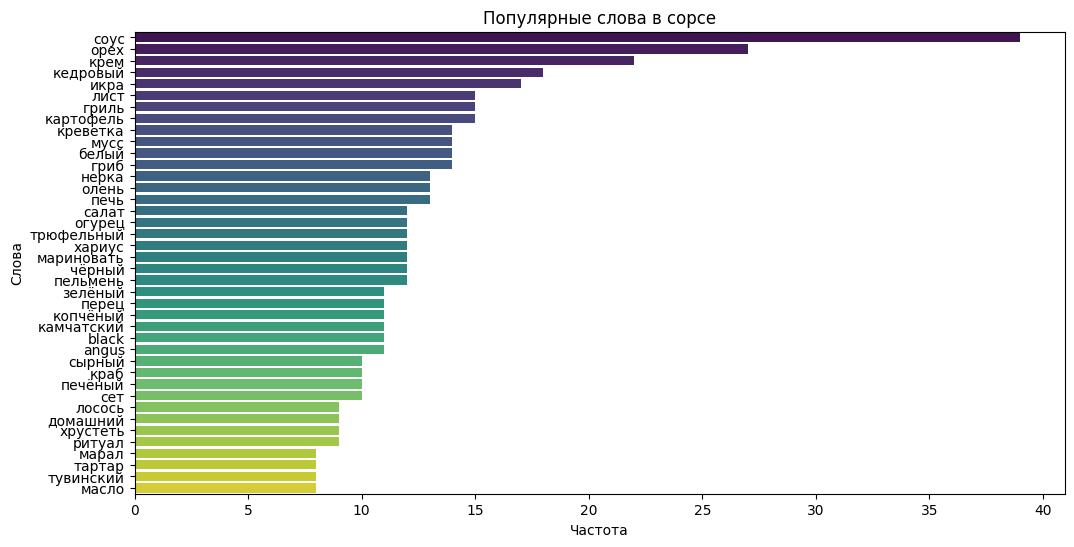

{'рикоттой': 1, 'панцанелла': 1, 'сухарик': 1, 'собственный': 1, 'киви': 1, 'кабачок': 1, 'цитронуть': 1, 'крудо': 1, 'свежий': 1, 'дорад': 1, 'томатный': 1, 'сальса': 1, 'орекьетта': 1, 'фисташковый': 1, 'фисташка': 1, 'медзь': 1, 'снежный': 1, 'неаполетана': 1, 'грудка': 1, 'птитим': 1, 'пармезан': 1, 'тунный': 1, 'кон': 1, 'чиполл': 1, 'моцарелла': 1, 'перра': 1, 'пекант': 1, 'голубой': 1, 'дора': 1, 'блю': 1, 'груша': 1, 'руккола': 1, 'лепесток': 1, 'арахис': 1, 'маскарпон': 1, 'базиликовый': 1, 'строганина': 1, 'осётр': 1, 'закуска': 1, 'севич': 1, 'компрессионный': 1, 'халапеньо': 1, 'ежевичный': 1, 'юккола': 1, 'туруханский': 1, 'броколя': 1, 'ромейный': 1, 'телятина': 1, 'запечёный': 1, 'баранина': 1}


C:\Users\mrpec\AppData\Local\Temp\ipykernel_22172\1653012068.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


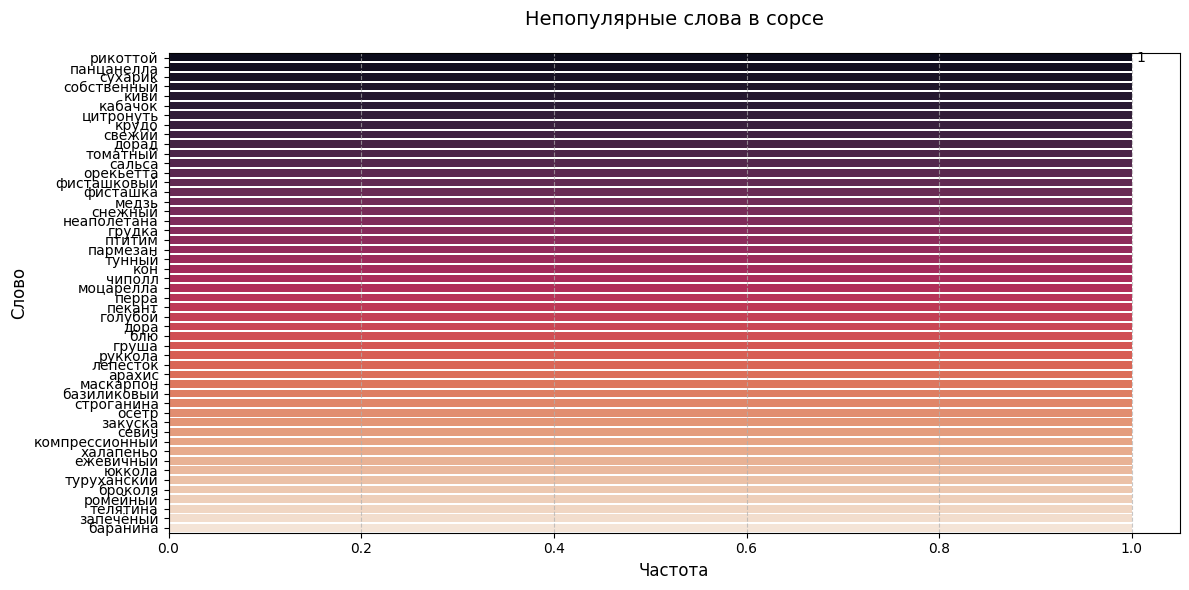

C:\Users\mrpec\AppData\Local\Temp\ipykernel_22172\1653012068.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")


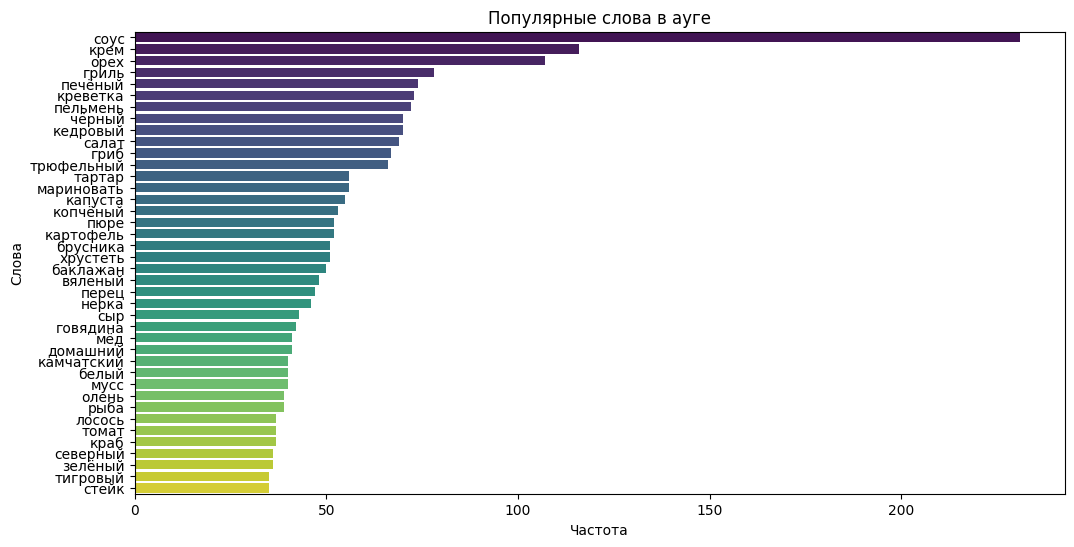

{'рататуй': 1, 'прошутто': 1, 'дыня': 1, 'шампин': 1, 'кунжут': 1, 'охотничий': 1, 'колбаса': 1, 'анчоус': 1, 'полба': 1, 'пекан': 1, 'терин': 1, 'местный': 1, 'холодец': 1, 'заливное': 1, 'тюлька': 1, 'фламбе': 1, 'крепнуть': 1, 'лаффер': 1, 'пит': 1, 'джем': 1, 'порция': 1, 'миндальный': 1, 'спагетти': 1, 'очарование': 1, 'мягкий': 1, 'черёмуха': 1, 'юкка': 1, 'сладкое': 1, 'ночной': 1, 'бедро': 1, 'жирный': 1, 'пудинг': 1, 'ракушка': 1, 'бефстроганов': 1, 'корзинка': 1, 'боб': 1, 'грильованный': 1, 'тесто': 1, 'мушмула': 1, 'медальон': 1, 'шарик': 1, 'сев': 1, 'жка': 1, 'моллюск': 1, 'вепрь': 1, 'гратный': 1, 'свежеть': 1, 'монгольский': 1, 'специя': 1, 'кориандр': 1}


C:\Users\mrpec\AppData\Local\Temp\ipykernel_22172\1653012068.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


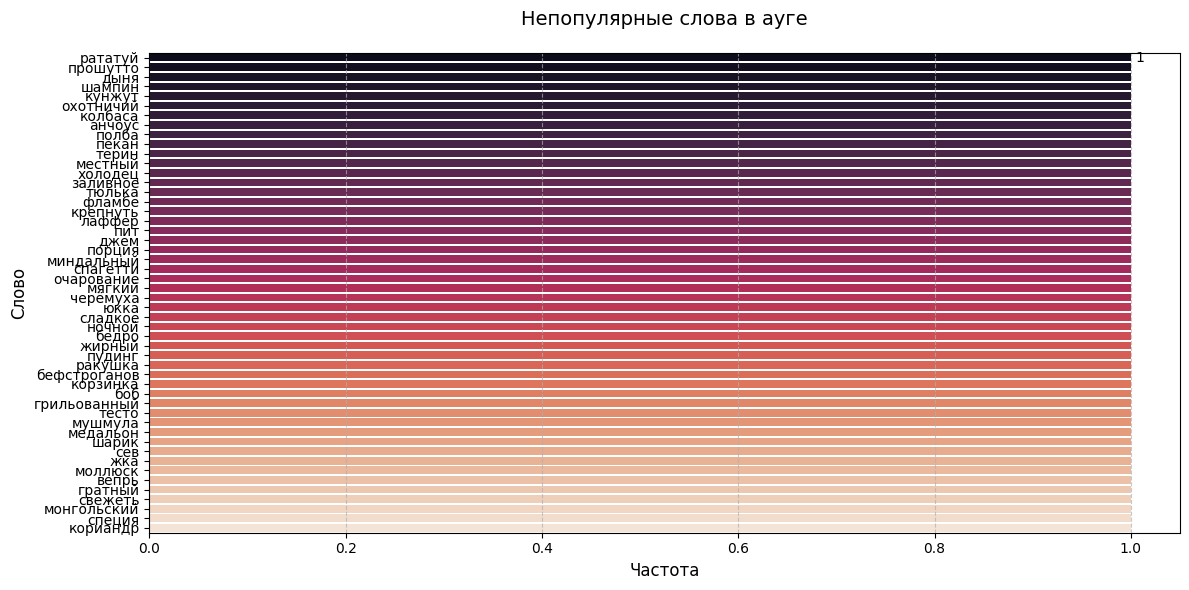

In [ ]:
# Функция для визуализации Bar Plot
def plot_bar_chart(word_freq, title, top_n=40):
    top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:top_n])
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")
    plt.title(title)
    plt.xlabel("Частота")
    plt.ylabel("Слова")
    plt.show()

    # Функция для получения редких слов
def get_rare_words(word_freq, top_n=50):
    return dict(sorted(word_freq.items(), key=lambda x: x[1])[:top_n])

# Получаем редкие слова
rare_words_src = get_rare_words(freq_src)
rare_words_aug = get_rare_words(freq_aug)

def plot_rare_words(word_freq, title, top_n=50):
    # Сортируем слова по частоте (возрастание) и берём топ-N редких
    rare_words = dict(sorted(word_freq.items(), key=lambda x: x[1])[:top_n])
    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(
        x=list(rare_words.values()),
        y=list(rare_words.keys()),
        palette="rocket"
    )
    
    # Добавляем подписи частот на столбцы
    barplot.bar_label(barplot.containers[0], fmt='%d', padding=3)
    
    plt.title(f"{title}", fontsize=14, pad=20)
    plt.xlabel("Частота", fontsize=12)
    plt.ylabel("Слово", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Визуализируем оба сета

plot_bar_chart(freq_src, "Популярные слова в сорсе")
plot_rare_words(rare_words_src, "Непопулярные слова в сорсе")

plot_bar_chart(freq_aug, "Популярные слова в ауге")
plot_rare_words(rare_words_aug, "Непопулярные слова в ауге")

---
Исходя из данных, чистим датасет – убираем самые непопулярные слова, которых нет в исходном датасете; добавляем слова, которых было мало в исходном датасете и не добавилось в аугментированном; удаляем нерелевантные строки.

Переходим к обучению -> **LoRA** 